In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# https://github.com/DebalB/Python_public/blob/master/extract_image_content/extract_image_content.py

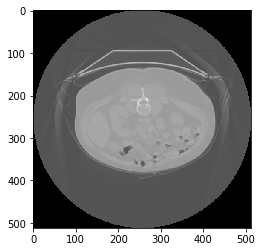

In [5]:
img = cv2.imread("27_YES_Anti-PD-1_Lung_CTAC_20081108122452_2_e1.nii.gz_SL_83_PROB_0.39526498317718506.jpg")
clone = img.copy()
(H, W) = img.shape[:2]
img_centre_x = W//2
img_centre_y = H//2
plt.imshow(img)

In [6]:
img.shape

(512, 512, 3)

(512, 512)

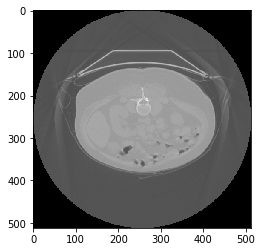

In [7]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
gray.shape

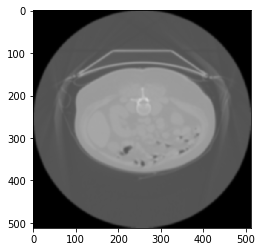

In [8]:
blurred = cv2.GaussianBlur(img, (11, 11), 0)
plt.imshow(blurred)

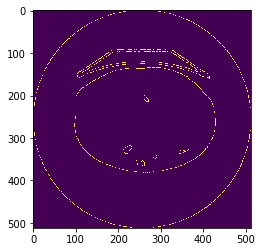

In [9]:
canny = cv2.Canny(blurred, 50, 100)
plt.imshow(canny)

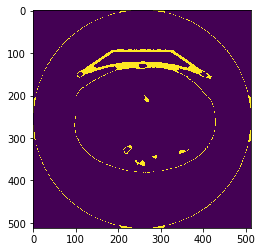

In [10]:
dilateSize = 3
#dilateSize = 15
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (dilateSize,dilateSize))
#canny_morphed = cv2.morphologyEx(canny, cv2.MORPH_CLOSE, kernel)
#canny_morphed = cv2.morphologyEx(canny, cv2.MORPH_OPEN, kernel)
canny_morphed = canny
canny_morphed  = cv2.dilate(canny_morphed,kernel,iterations=5)
#cv2.imshow("canny_morphed1", canny_morphed)
canny_morphed  = cv2.erode(canny_morphed,kernel,iterations=5)
plt.imshow(canny_morphed)

In [11]:
MIN_CONTOUR_AREA = 7000
RESIZE_IMAGE = False
DEBUG = False

In [12]:
import contour_lib
contours_list = contour_lib.get_contours(canny_morphed, min_contour_area=1500.0)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No of points in contour= 636, area: 76026.5


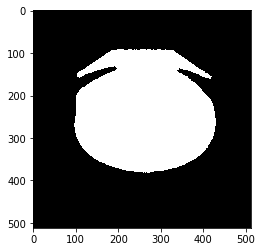

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No of points in contour= 420, area: 65648.5


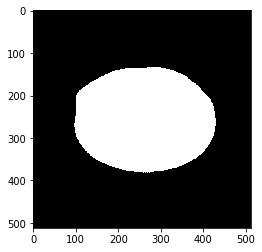

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


No of points in contour= 174, area: 5031.0


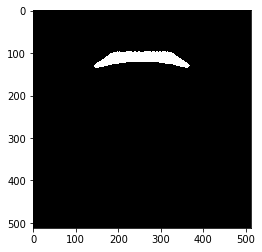

In [13]:
for c in contours_list:
    tmpAreaBlack = np.zeros(clone.shape)
    print("No of points in contour= {}, area: {}".format(len(c[0]), c[2]))
    cv2.drawContours(tmpAreaBlack,[c[0]], 0, (255,255,255),cv2.FILLED)
    plt.imshow(tmpAreaBlack)
    plt.show()

No of points in contour= 1, area: 65648.5


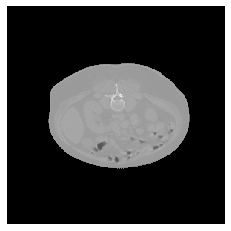

In [14]:
tmpAreaBlack = np.zeros(clone.shape)
c=contours_list[1]
print("No of points in contour= {}, area: {}".format(len([0]), c[2]))
cv2.drawContours(tmpAreaBlack,[c[0]], 0, (255,255,255),cv2.FILLED)

mask = tmpAreaBlack[:,:,0].astype("uint8")
new_img_blk_bg = cv2.bitwise_and(clone, clone, mask=mask)
plt.imshow(new_img_blk_bg)
plt.axis("off")
plt.savefig("output1.jpg")
plt.show()

